In [21]:
from pathlib import Path
import sys

sys.path.append(str(Path('').absolute().parent))


from stable_baselines3 import DQN
from stable_baselines3.dqn import MlpPolicy
from stable_baselines3.common.env_util import make_vec_env

from gym_snake.envs.SnakeEnv import SnakeEnv

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import random
random.seed(42)

In [22]:
def plot_metrics(metrics, filepath=None):
    formatted_dict = {'episodes': [],
                      'metrics': [],
                      'results': []}

    n = len(metrics['score'])
    for i in range(n):        
        score = metrics['score'][i]
        reward = metrics['reward'][i]

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('score')
        formatted_dict['results'].append(score)

        formatted_dict['episodes'].append(i)
        formatted_dict['metrics'].append('reward')
        formatted_dict['results'].append(reward)

    df_metrics = pd.DataFrame(formatted_dict)
    sns.lineplot(data=df_metrics, x='episodes', y='results', hue='metrics')
    if filepath is None:
        plt.show()
    else:
        plt.savefig(filepath)
        
def evaluate(model):
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)
    obs = env.reset()

    for _ in range(10000):
        action, _states = model.predict(obs)
        obs, rewards, dones, info = env.step(action)
        env.render()

    return snake_env.record, np.mean(np.array(snake_env.results['score']))

### Testando: trocar total_timesteps para 80000, porque learning_starts = 50000

In [23]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.90, 1)
    
    model = DQN(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma)
    model.learn(total_timesteps=80000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 70       |
|    ep_rew_mean      | -25.4    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 191      |
|    time_elapsed     | 379      |
|    total timesteps  | 72741    |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 0.348    |
|    n_updates        | 5685     |
----------------------------------
Using cpu device
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68.4     |
|    ep_rew_mean      | -29.2    |
|    exploration rate | 0.05     |
| time/               |          |
|    episodes         | 1000     |
|    fps              | 654      |
|    time_elapsed     | 113      |
|    total timesteps  | 74562    |
| train/              |          |
|    learning_rate    | 0.001    |
|   

Gamma 0.9639426798457884


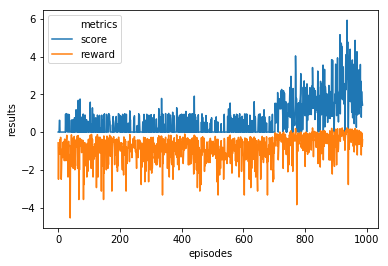

Max Train Score 10 Max Test Score 10
Mean Train Score 0.6674109249186733 Mean Test Score 2.6802026824833973
----------------------------------------------------------------------------------------------------
Gamma 0.9941485546327461


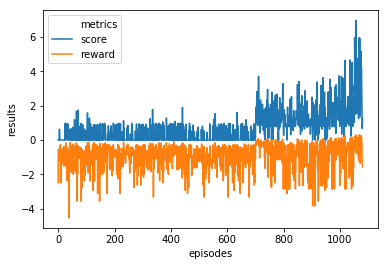

Max Train Score 14 Max Test Score 4
Mean Train Score 0.7090041219407255 Mean Test Score 1.5095813621359087
----------------------------------------------------------------------------------------------------
Gamma 0.9207341704971245


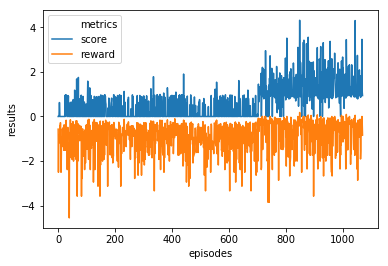

Max Train Score 7 Max Test Score 8
Mean Train Score 0.6230925097076214 Mean Test Score 1.5521437669997074
----------------------------------------------------------------------------------------------------
Gamma 0.9610076580078751


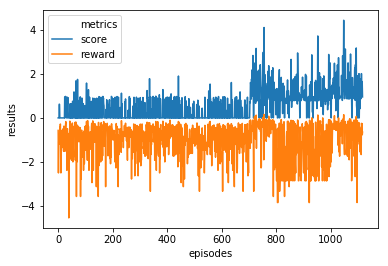

Max Train Score 8 Max Test Score 8
Mean Train Score 0.590477946168058 Mean Test Score 1.6765367578120307
----------------------------------------------------------------------------------------------------
Gamma 0.9945232804069237


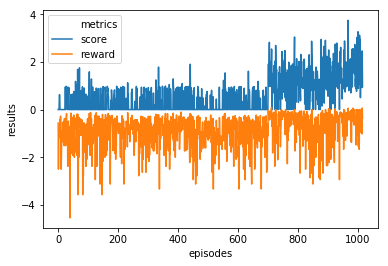

Max Train Score 7 Max Test Score 8
Mean Train Score 0.581584449824495 Mean Test Score 1.5463043288787544
----------------------------------------------------------------------------------------------------
Gamma 0.9237530201446925


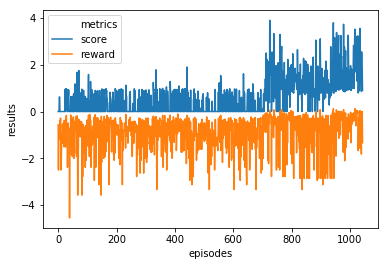

Max Train Score 7 Max Test Score 5
Mean Train Score 0.6103188873666114 Mean Test Score 1.2555010029801275
----------------------------------------------------------------------------------------------------
Gamma 0.9237640226640934


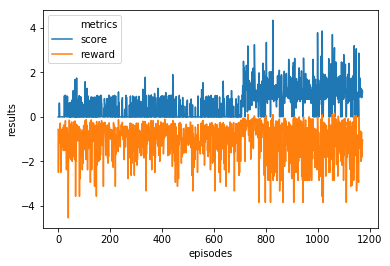

Max Train Score 6 Max Test Score 4
Mean Train Score 0.6150982817285732 Mean Test Score 1.0455776951848275
----------------------------------------------------------------------------------------------------
Gamma 0.9453544132955172


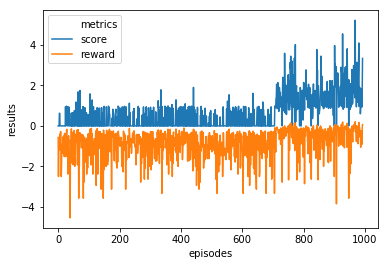

Max Train Score 9 Max Test Score 11
Mean Train Score 0.6289446984265643 Mean Test Score 2.144200475699038
----------------------------------------------------------------------------------------------------
Gamma 0.9902000893690727


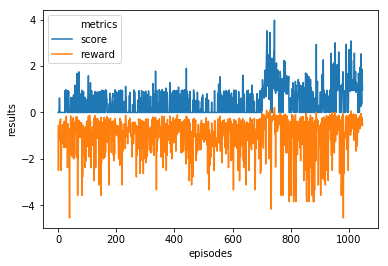

Max Train Score 9 Max Test Score 4
Mean Train Score 0.45879040266290844 Mean Test Score 1.0862070320245143
----------------------------------------------------------------------------------------------------
Gamma 0.9414183737882724


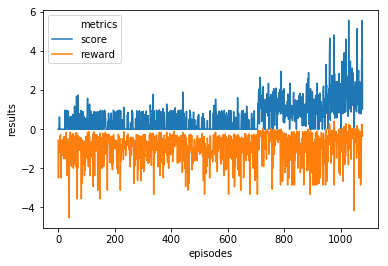

Max Train Score 10 Max Test Score 6
Mean Train Score 0.6253318300322311 Mean Test Score 1.1143182968311522
----------------------------------------------------------------------------------------------------


In [24]:
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

### Usando total_timesteps = 20000, para comparar de forma justa com os outros, mas agora trocando o learning_starts

In [25]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.90, 1)
    
    model = DQN(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma, learning_starts=10000)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device


Gamma 0.9299752253921564


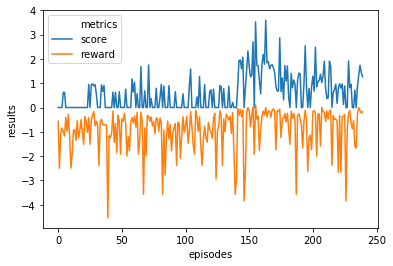

Max Train Score 6 Max Test Score 5
Mean Train Score 0.6185770434121037 Mean Test Score 1.250078795150121
----------------------------------------------------------------------------------------------------
Gamma 0.906861837045277


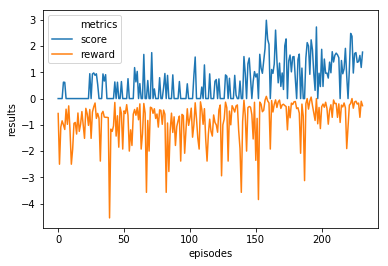

Max Train Score 6 Max Test Score 14
Mean Train Score 0.6338000201514344 Mean Test Score 2.2949346124018635
----------------------------------------------------------------------------------------------------
Gamma 0.9746292545492398


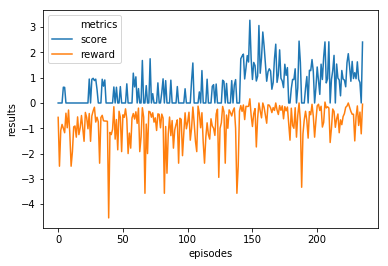

Max Train Score 7 Max Test Score 5
Mean Train Score 0.6370676504515828 Mean Test Score 1.2139872138457206
----------------------------------------------------------------------------------------------------
Gamma 0.9114532871378898


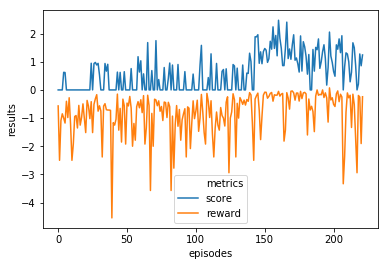

Max Train Score 7 Max Test Score 4
Mean Train Score 0.6105229376434526 Mean Test Score 0.6886072269696051
----------------------------------------------------------------------------------------------------
Gamma 0.9632940855765796


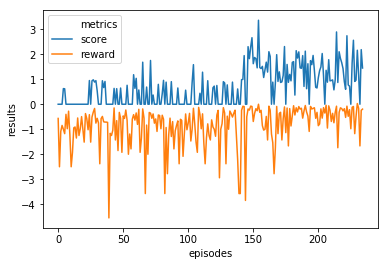

Max Train Score 6 Max Test Score 1
Mean Train Score 0.6869205720716712 Mean Test Score 0.05497626870162769
----------------------------------------------------------------------------------------------------
Gamma 0.987703841157556


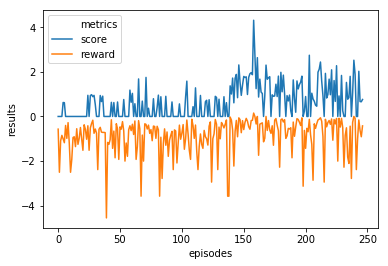

Max Train Score 7 Max Test Score 4
Mean Train Score 0.656414322276569 Mean Test Score 1.147499791596041
----------------------------------------------------------------------------------------------------
Gamma 0.919443523673971


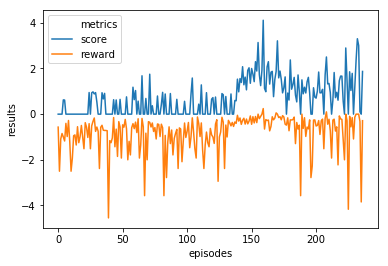

Max Train Score 8 Max Test Score 11
Mean Train Score 0.7177914187094214 Mean Test Score 1.980167255039699
----------------------------------------------------------------------------------------------------
Gamma 0.9973146815821694


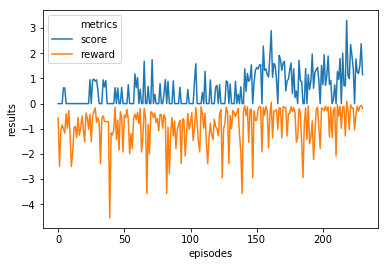

Max Train Score 6 Max Test Score 4
Mean Train Score 0.5953354201360508 Mean Test Score 1.0771601183988566
----------------------------------------------------------------------------------------------------
Gamma 0.9185149842437662


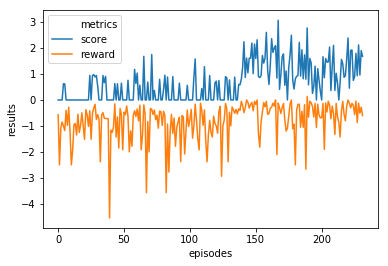

Max Train Score 6 Max Test Score 2
Mean Train Score 0.6765994158358871 Mean Test Score 0.9888753739638311
----------------------------------------------------------------------------------------------------
Gamma 0.9752009823554785


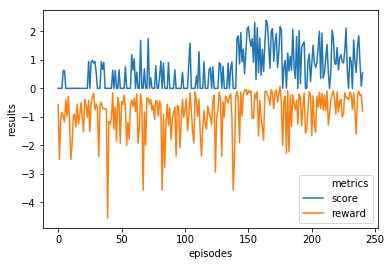

Max Train Score 6 Max Test Score 9
Mean Train Score 0.6261981647986772 Mean Test Score 1.5132962067666311
----------------------------------------------------------------------------------------------------


In [26]:
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

### Deixando learning_starts ainda menor, mantendo total_timesteps = 20000

In [27]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.90, 1)
    
    model = DQN(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma, learning_starts=5000)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device


Gamma 0.9270916426976197


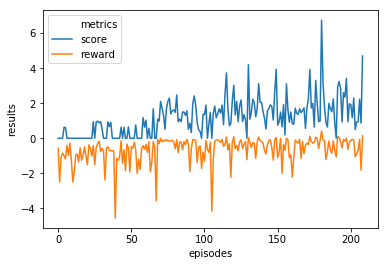

Max Train Score 14 Max Test Score 3
Mean Train Score 1.1760705759696393 Mean Test Score 0.6360898376202124
----------------------------------------------------------------------------------------------------
Gamma 0.9720074664104195


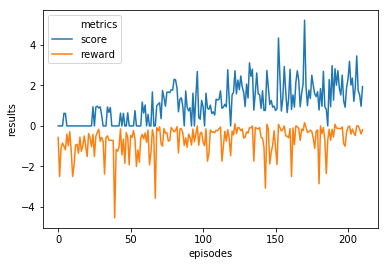

Max Train Score 9 Max Test Score 3
Mean Train Score 1.1351959883467804 Mean Test Score 1.2011806313409819
----------------------------------------------------------------------------------------------------
Gamma 0.9569849644678322


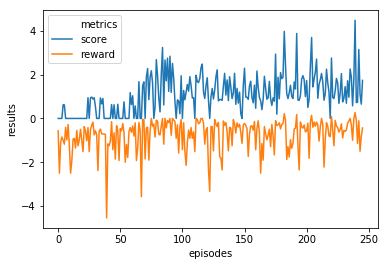

Max Train Score 8 Max Test Score 5
Mean Train Score 1.0842031160884606 Mean Test Score 1.408719187225861
----------------------------------------------------------------------------------------------------
Gamma 0.9546598137602028


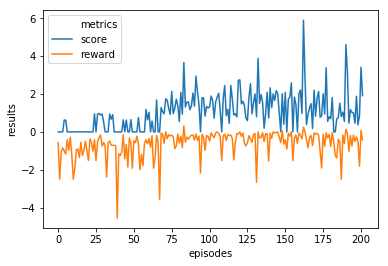

Max Train Score 11 Max Test Score 11
Mean Train Score 1.0539701277575042 Mean Test Score 1.8632063643073862
----------------------------------------------------------------------------------------------------
Gamma 0.9282838983282827


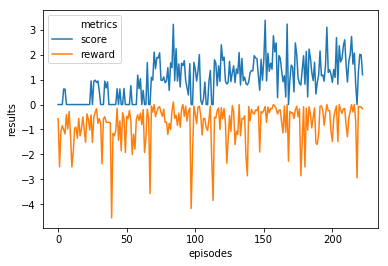

Max Train Score 6 Max Test Score 8
Mean Train Score 1.0189794674505732 Mean Test Score 1.170362093586096
----------------------------------------------------------------------------------------------------
Gamma 0.9824927203268701


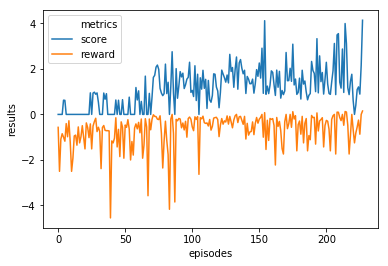

Max Train Score 8 Max Test Score 8
Mean Train Score 1.1342068181074594 Mean Test Score 1.7643186884678785
----------------------------------------------------------------------------------------------------
Gamma 0.942096055691008


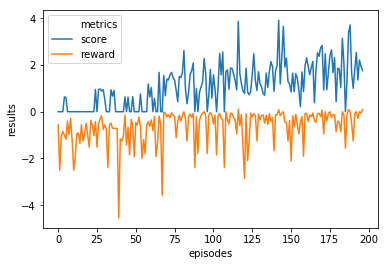

Max Train Score 7 Max Test Score 18
Mean Train Score 1.093634309187979 Mean Test Score 1.8467916394102442
----------------------------------------------------------------------------------------------------
Gamma 0.938136429765763


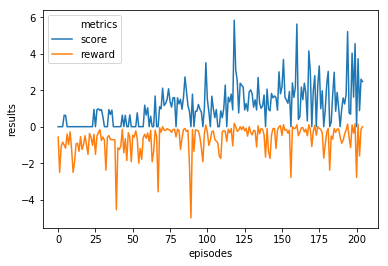

Max Train Score 8 Max Test Score 2
Mean Train Score 1.1209110936235436 Mean Test Score 0.032787750521193496
----------------------------------------------------------------------------------------------------
Gamma 0.9830571633780318


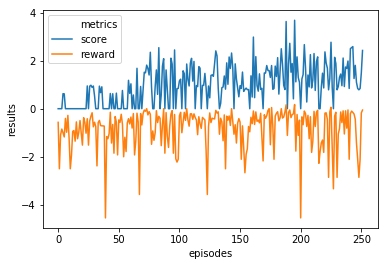

Max Train Score 9 Max Test Score 7
Mean Train Score 0.9863035527027825 Mean Test Score 1.8106259498975252
----------------------------------------------------------------------------------------------------
Gamma 0.9950555169851427


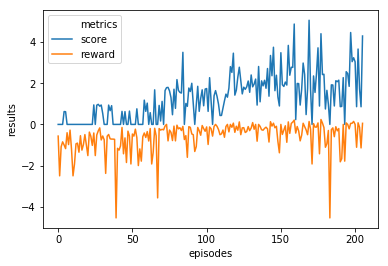

Max Train Score 12 Max Test Score 19
Mean Train Score 1.2951474893310937 Mean Test Score 3.485362879112943
----------------------------------------------------------------------------------------------------


In [28]:
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

In [29]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.90, 1)
    
    model = DQN(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma, learning_starts=1000)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device


Gamma 0.9308866070063881


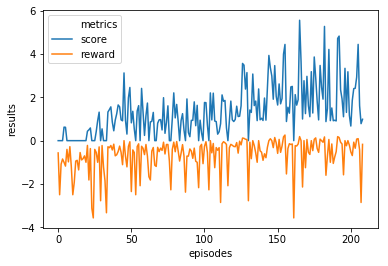

Max Train Score 10 Max Test Score 17
Mean Train Score 1.3584225749209438 Mean Test Score 3.314997996721256
----------------------------------------------------------------------------------------------------
Gamma 0.9129185701759215


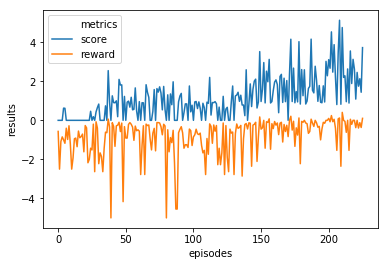

Max Train Score 11 Max Test Score 13
Mean Train Score 1.1422711871566125 Mean Test Score 2.925498010862917
----------------------------------------------------------------------------------------------------


In [30]:
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

In [31]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.90, 1)
    
    model = DQN(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma, learning_starts=500)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device


Gamma 0.9129185701759215


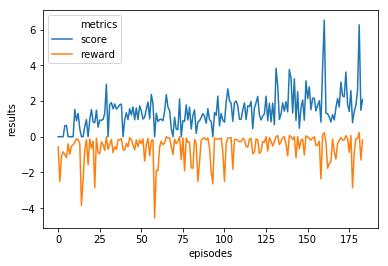

Max Train Score 10 Max Test Score 13
Mean Train Score 1.4142813480666927 Mean Test Score 2.7999712022946146
----------------------------------------------------------------------------------------------------
Gamma 0.964349326336132


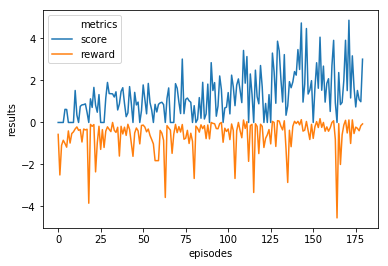

Max Train Score 10 Max Test Score 11
Mean Train Score 1.276298675784562 Mean Test Score 2.344908512824098
----------------------------------------------------------------------------------------------------
Gamma 0.9767470774495464


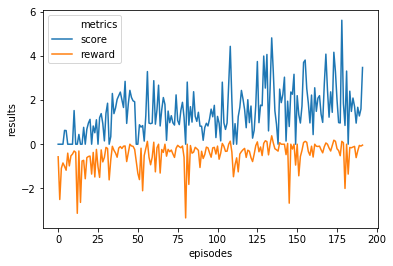

Max Train Score 9 Max Test Score 3
Mean Train Score 1.4676050080459884 Mean Test Score 0.04471364172699333
----------------------------------------------------------------------------------------------------
Gamma 0.9059638039513848


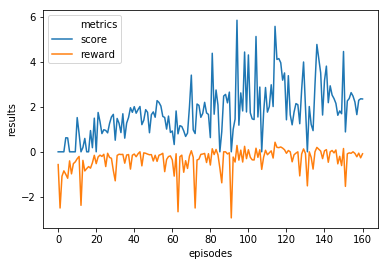

Max Train Score 11 Max Test Score 8
Mean Train Score 1.7801486709615197 Mean Test Score 1.8120645735302567
----------------------------------------------------------------------------------------------------
Gamma 0.9796143465162211


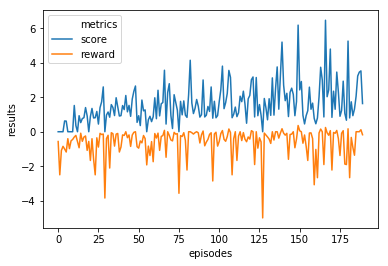

Max Train Score 14 Max Test Score 3
Mean Train Score 1.587953218981281 Mean Test Score 1.2338211268256756
----------------------------------------------------------------------------------------------------
Gamma 0.9834723945576694


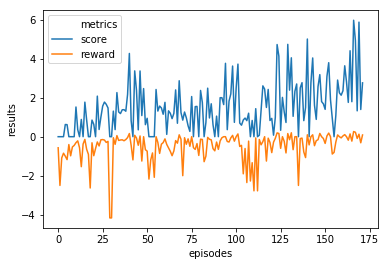

Max Train Score 12 Max Test Score 5
Mean Train Score 1.4995810478367166 Mean Test Score 1.2784596652494706
----------------------------------------------------------------------------------------------------
Gamma 0.9589789589205258


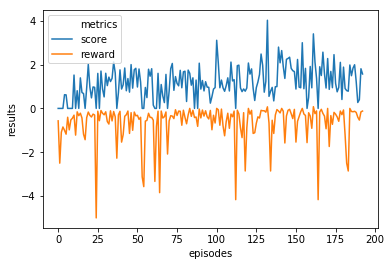

Max Train Score 8 Max Test Score 3
Mean Train Score 1.1730889884838083 Mean Test Score 0.7253998761163223
----------------------------------------------------------------------------------------------------
Gamma 0.9505960789677078


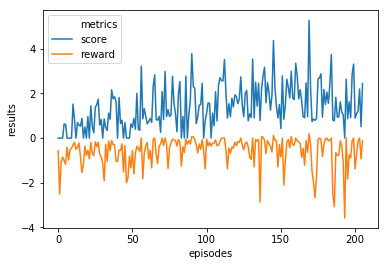

Max Train Score 9 Max Test Score 8
Mean Train Score 1.383005070541883 Mean Test Score 1.6959209921315008
----------------------------------------------------------------------------------------------------
Gamma 0.9135664048706337


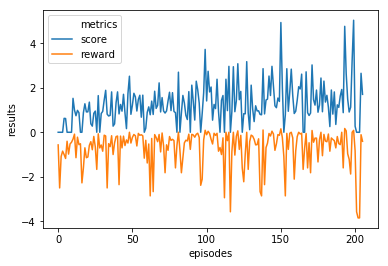

Max Train Score 8 Max Test Score 5
Mean Train Score 1.262818043382414 Mean Test Score 1.3240665390930648
----------------------------------------------------------------------------------------------------
Gamma 0.9131411806420485


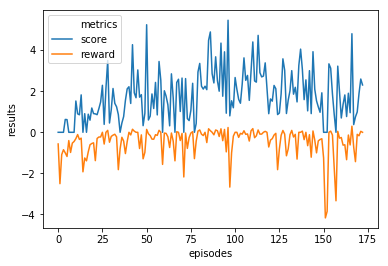

Max Train Score 10 Max Test Score 13
Mean Train Score 1.7784887588888758 Mean Test Score 2.6237286148855024
----------------------------------------------------------------------------------------------------


In [32]:
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

In [33]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.90, 1)
    
    model = DQN(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma, learning_starts=1000)
    model.learn(total_timesteps=40000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device


Gamma 0.9642699163829831


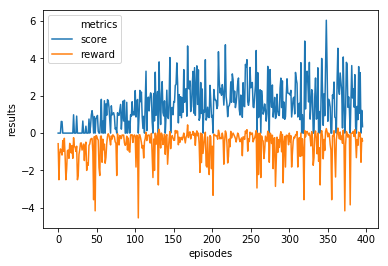

Max Train Score 14 Max Test Score 21
Mean Train Score 1.472107842729379 Mean Test Score 4.385437053084806
----------------------------------------------------------------------------------------------------
Gamma 0.9533650127416263


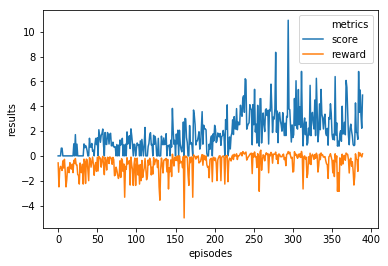

Max Train Score 17 Max Test Score 7
Mean Train Score 1.8142443739012548 Mean Test Score 1.6859825700706492
----------------------------------------------------------------------------------------------------
Gamma 0.9672767712227369


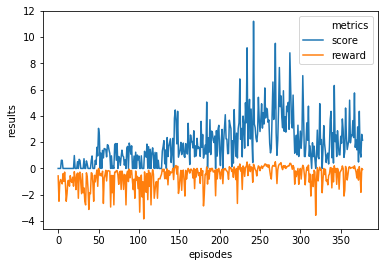

Max Train Score 20 Max Test Score 18
Mean Train Score 1.887805025395407 Mean Test Score 2.758177823781779
----------------------------------------------------------------------------------------------------
Gamma 0.9684041625470385


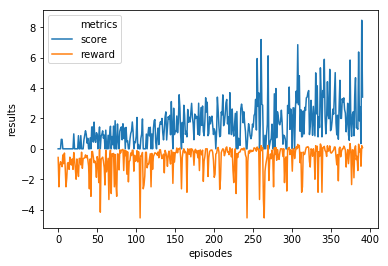

Max Train Score 14 Max Test Score 19
Mean Train Score 1.5337706966715945 Mean Test Score 3.189712774843384
----------------------------------------------------------------------------------------------------
Gamma 0.9738686522268636


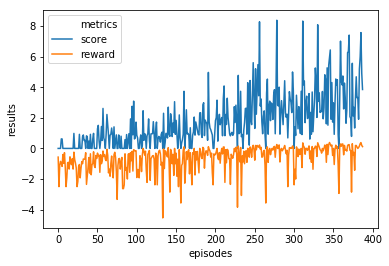

Max Train Score 16 Max Test Score 21
Mean Train Score 1.7894253330062921 Mean Test Score 2.7959109372566346
----------------------------------------------------------------------------------------------------
Gamma 0.974125237871649


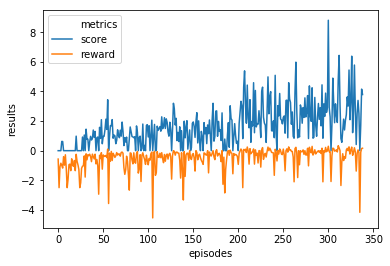

Max Train Score 18 Max Test Score 8
Mean Train Score 1.6453864665544913 Mean Test Score 2.6065564990035868
----------------------------------------------------------------------------------------------------
Gamma 0.9200178340991121


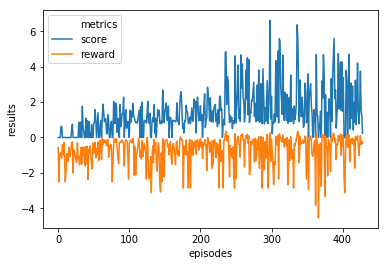

Max Train Score 11 Max Test Score 14
Mean Train Score 1.4238035902503825 Mean Test Score 2.4395531037080542
----------------------------------------------------------------------------------------------------
Gamma 0.9256443975473482


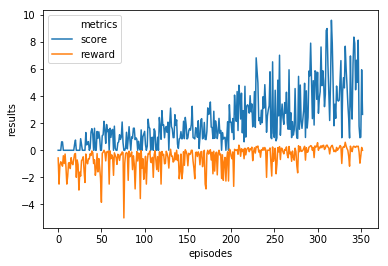

Max Train Score 18 Max Test Score 23
Mean Train Score 2.1501581326187313 Mean Test Score 4.897324600786333
----------------------------------------------------------------------------------------------------
Gamma 0.968656616987574


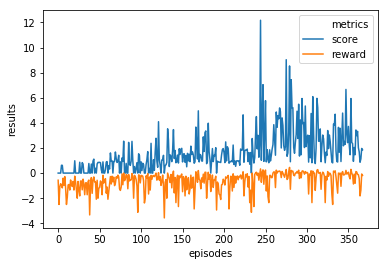

Max Train Score 23 Max Test Score 22
Mean Train Score 1.6753926198652977 Mean Test Score 4.619833981202017
----------------------------------------------------------------------------------------------------
Gamma 0.9551643560911257


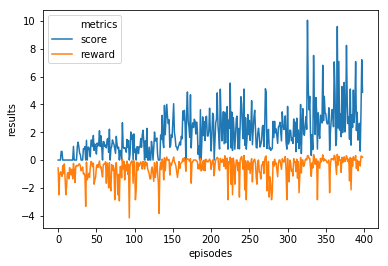

Max Train Score 18 Max Test Score 21
Mean Train Score 1.9380568332221344 Mean Test Score 4.949697342160061
----------------------------------------------------------------------------------------------------


In [34]:
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

In [35]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.90, 1)
    
    model = DQN(MlpPolicy, env, verbose=1, learning_rate=1e-3, seed=42, gamma=gamma, learning_starts=1000)
    model.learn(total_timesteps=80000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device
Using cpu device


Gamma 0.9815215940653862


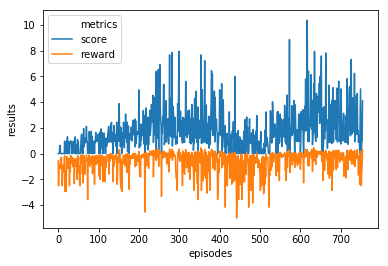

Max Train Score 20 Max Test Score 8
Mean Train Score 1.7774012335530702 Mean Test Score 1.4394167683669976
----------------------------------------------------------------------------------------------------
Gamma 0.9120745807366194


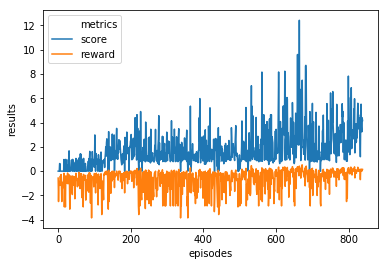

Max Train Score 22 Max Test Score 15
Mean Train Score 1.855265635171357 Mean Test Score 2.163189117025019
----------------------------------------------------------------------------------------------------
Gamma 0.9304691152349509


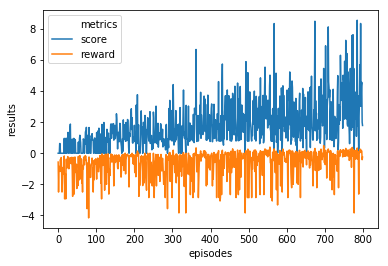

Max Train Score 16 Max Test Score 20
Mean Train Score 1.7781228385718877 Mean Test Score 3.8384080576540303
----------------------------------------------------------------------------------------------------
Gamma 0.9911335926628618


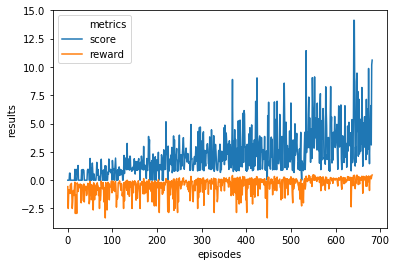

Max Train Score 27 Max Test Score 23
Mean Train Score 2.3159702219407046 Mean Test Score 5.0780222238213515
----------------------------------------------------------------------------------------------------
Gamma 0.9848010595755965


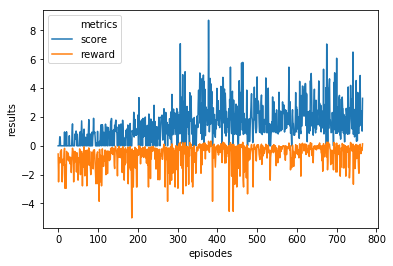

Max Train Score 19 Max Test Score 11
Mean Train Score 1.5113842621928935 Mean Test Score 1.9672968886645752
----------------------------------------------------------------------------------------------------
Gamma 0.900128115749469


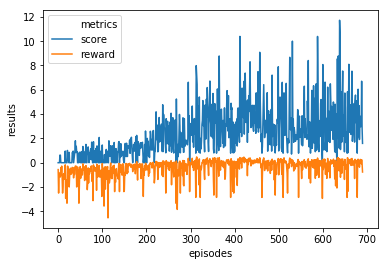

Max Train Score 20 Max Test Score 16
Mean Train Score 2.426884125319646 Mean Test Score 4.107435062943757
----------------------------------------------------------------------------------------------------
Gamma 0.9231018003312208


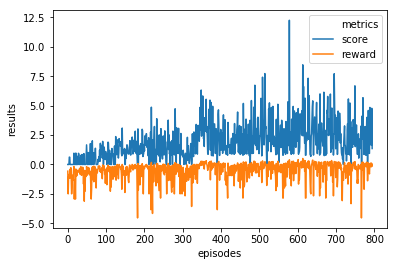

Max Train Score 25 Max Test Score 10
Mean Train Score 1.9211416108934833 Mean Test Score 1.8096023956446023
----------------------------------------------------------------------------------------------------
Gamma 0.9210752385701448


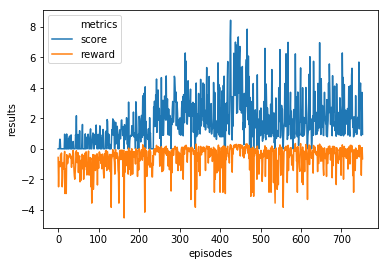

Max Train Score 16 Max Test Score 16
Mean Train Score 1.832187254863838 Mean Test Score 3.12016095842891
----------------------------------------------------------------------------------------------------
Gamma 0.9697642807139579


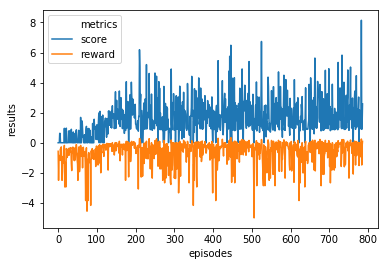

Max Train Score 14 Max Test Score 10
Mean Train Score 1.6350648995626136 Mean Test Score 2.1177861355372523
----------------------------------------------------------------------------------------------------
Gamma 0.9681174360443378


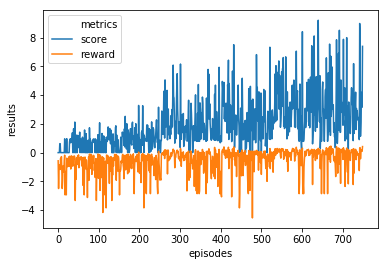

Max Train Score 19 Max Test Score 18
Mean Train Score 2.009980665401398 Mean Test Score 3.165924849891379
----------------------------------------------------------------------------------------------------


In [36]:
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)

### Mantendo learning_starts=1000, total_timesteps=20000, e variando learning_rate

In [ ]:
results = {}
for _ in range(10):
    # enable_render=True turns on the display
    snake_env = SnakeEnv(440, 440, enable_render=False)
    env = make_vec_env(lambda: snake_env, n_envs=1)

    gamma = random.uniform(0.90, 1)
    
    model = DQN(MlpPolicy, env, verbose=1, learning_rate=5e-3, seed=42, gamma=gamma, learning_starts=1000)
    model.learn(total_timesteps=20000, log_interval=1000)

    # Print rewards and scores for each episode
    max_train_score = snake_env.record
    mean_train_score = np.mean(np.array(snake_env.results['score']))
    max_test_score, mean_test_score = evaluate(model)
    
    results[gamma] = (snake_env.results, max_train_score, max_test_score, mean_train_score, mean_test_score)

Using cpu device
Using cpu device
Using cpu device


In [ ]:
for gamma, result in results.items():
    metrics, max_train_score, max_test_score, mean_train_score, mean_test_score = result
    
    print("Gamma", gamma)
    plot_metrics(metrics)    
    print("Max Train Score", max_train_score, "Max Test Score", max_test_score)
    print("Mean Train Score", mean_train_score, "Mean Test Score", mean_test_score)
    print("-"*100)